# Importing Required Library

In [55]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from time import time
from PIL import Image
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import seaborn as sns

# Data Import And Read

In [56]:
# import os
# for dirname, _, filenames in os.walk('../input/covid19-image-dataset/Covid19-dataset'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [57]:
train_path = "../input/covid19-image-dataset/Covid19-dataset/train"
val_path = "../input/covid19-image-dataset/Covid19-dataset/test"
types = ['Covid','Normal','Viral Pneumonia']
print(types)


['Covid', 'Normal', 'Viral Pneumonia']


# Data Preprocess

In [58]:
train_images = []
train_labels = []
mappings =  {'Covid':0,'Normal':1,'Viral Pneumonia':2}
for t in types:
    images = os.listdir(train_path +'/'+ t)
    for img_path in images:
        img = Image.open(train_path + '/' + t + '/' + img_path).convert('L')
        img = img.resize((50,50), Image.ANTIALIAS)
        img = np.asarray(img)/255
        train_images.append(img)
        train_labels.append(mappings[t])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  


In [59]:
val_images = []
val_labels = []
mappings =  {'Covid':0,'Normal':1,'Viral Pneumonia':2}
for t in types:
    images = os.listdir(val_path +'/'+ t)
    for img_path in images:
        img = Image.open(val_path +'/'+ t + '/' + img_path).convert('L')
        img = img.resize((50,50), Image.ANTIALIAS)
        img = np.asarray(img)/255
        val_images.append(img)
        val_labels.append(mappings[t])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  


# DataSplit and verification

In [60]:
X_train = np.stack(train_images,axis=0)
y_train = train_labels
X_test = np.stack(val_images,axis=0)
y_test = val_labels


In [61]:
X_train.shape

(251, 50, 50)

# Data Visualization

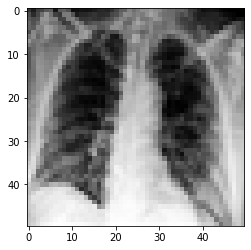

In [62]:
dim = (50,50)
plt.imshow(X_train[0],cmap='gray')

In [63]:
X_train = X_train.reshape(len(y_train),-1)
X_test = X_test.reshape(len(y_test),-1)

# PCA Feature Extraction

In [64]:
pca = PCA(n_components=150)
pca.fit(X_train)

PCA(n_components=150)

In [65]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [66]:
X_train_pca.shape

(251, 150)

# SVM Classifier algorithm

In [67]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(X_train_pca, y_train)  

SVC(kernel='linear', random_state=0)

In [68]:
#Predicting the test set result  
y_pred= classifier.predict(X_test_pca)  

In [69]:
from sklearn.metrics import accuracy_score
print("accuracy Score -->",accuracy_score(y_test,y_pred)*100)

accuracy Score --> 86.36363636363636


# Classification Report

In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91        26
           1       0.85      0.85      0.85        20
           2       0.84      0.80      0.82        20

    accuracy                           0.86        66
   macro avg       0.86      0.86      0.86        66
weighted avg       0.86      0.86      0.86        66



# Confusion Matrix

In [71]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  

<AxesSubplot:>

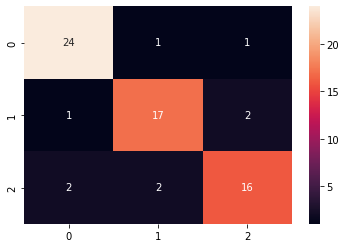

In [72]:

sns.heatmap(cm, annot=True)

# XGBoost Classifier

In [73]:
from xgboost import XGBClassifier

In [74]:
classifier = XGBClassifier()
classifier.fit(X_train_pca, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [75]:
#Predicting the test set result  
y_pred= classifier.predict(X_test_pca)  
from sklearn.metrics import accuracy_score
print("accuracy Score -->",accuracy_score(y_test,y_pred)*100)

accuracy Score --> 81.81818181818183


# Classification Report

In [76]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        26
           1       0.81      0.65      0.72        20
           2       0.71      0.85      0.77        20

    accuracy                           0.82        66
   macro avg       0.81      0.81      0.81        66
weighted avg       0.82      0.82      0.82        66



# Confusion Matrix

<AxesSubplot:>

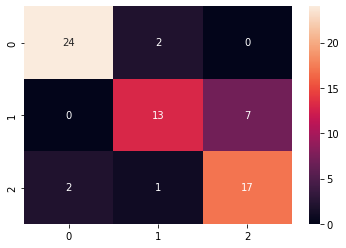

In [77]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
sns.heatmap(cm, annot=True)

In [78]:
#Dataset
#https://www.kaggle.com/datasets/pranavraikokte/covid19-image-dataset/versions/2

# BaggingClassifier

In [79]:
from sklearn.ensemble import BaggingClassifier

In [80]:
clf = BaggingClassifier(base_estimator=SVC(),n_estimators=10, random_state=0)
clf.fit(X_train_pca, y_train)

BaggingClassifier(base_estimator=SVC(), random_state=0)

In [81]:
#Predicting the test set result  
y_pred= clf.predict(X_test_pca)  
from sklearn.metrics import accuracy_score
print("accuracy Score -->",accuracy_score(y_test,y_pred)*100)

accuracy Score --> 81.81818181818183


# classification report

In [82]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        26
           1       0.76      0.80      0.78        20
           2       0.76      0.80      0.78        20

    accuracy                           0.82        66
   macro avg       0.81      0.82      0.81        66
weighted avg       0.82      0.82      0.82        66



# confusion matrix

<AxesSubplot:>

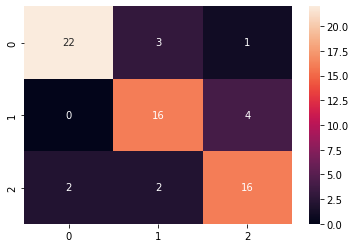

In [83]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
sns.heatmap(cm, annot=True)